<a href="https://colab.research.google.com/github/vloneonme/trew/blob/main/4m_lr2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Узлы интерполяции:
x_0 = 1, y_0 = 2.000000
x_1 = 2, y_1 = 2.449490
x_2 = 3, y_2 = 2.828427
x_3 = 4, y_3 = 3.162278

1. Полином Ньютона:
Коэффициенты разделенных разностей:
a_0 = 2.000000
a_1 = 0.449490
a_2 = -0.035276
a_3 = 0.004244

Полином Ньютона в явном виде:
N3(x) = 2.000000 + 0.449490(x-1) + -0.035276(x-1)(x-2) + 0.004244(x-1)(x-2)(x-3)

2. Аппроксимирующая парабола МНК:
P2(x) = -0.028910x² + 0.531126x + 1.499057

3. Погрешности:
Макс. погрешность интерполяции на [1,4]: 0.001009
Макс. погрешность экстраполяции на [0,1]: 0.040279
Макс. погрешность экстраполяции на [4,5]: 0.012405
Макс. погрешность МНК в узлах: 0.003820
СКО МНК в узлах: 0.002847

Проверка в узлах интерполяции:
x = 1: Ньютон = 2.0000000000, Точное = 2.0000000000, Ошибка = 0.00e+00
x = 2: Ньютон = 2.4494897428, Точное = 2.4494897428, Ошибка = 0.00e+00
x = 3: Ньютон = 2.8284271247, Точное = 2.8284271247, Ошибка = 0.00e+00
x = 4: Ньютон = 3.1622776602, Точное = 3.1622776602, Ошибка = 0.00e+00


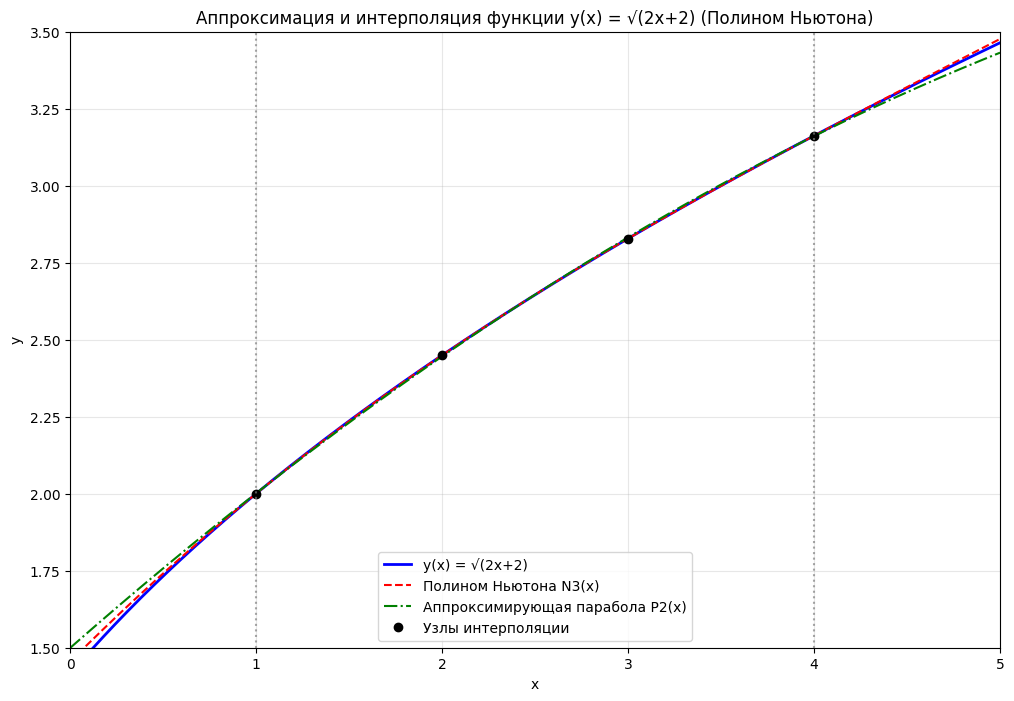

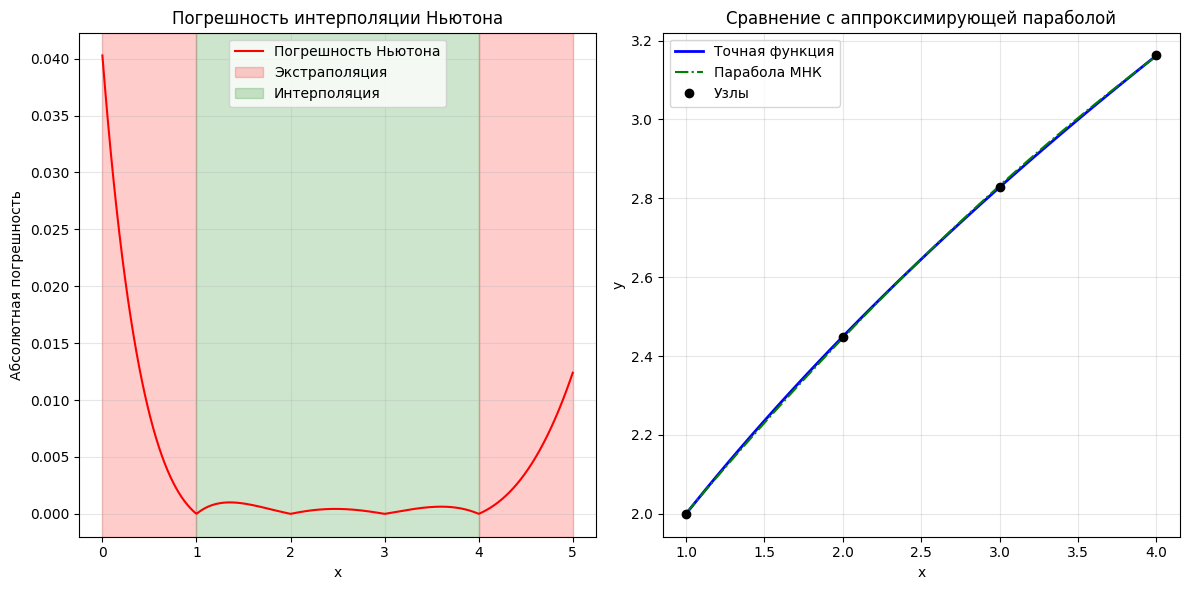


Таблица разделенных разностей:
x_i    y_i       1-я разн.   2-я разн.   3-я разн.
1.0  2.000000  0.449490  -0.035276  0.004244
2.0  2.449490  0.378937  -0.022543
3.0  2.828427  0.333851
4.0  3.162278


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Исходная функция
def y(x):
    return np.sqrt(2*x + 2)

# Узлы интерполяции
x_nodes = np.array([1, 2, 3, 4])
y_nodes = y(x_nodes)

print("Узлы интерполяции:")
for i in range(len(x_nodes)):
    print(f"x_{i} = {x_nodes[i]}, y_{i} = {y_nodes[i]:.6f}")

# 1. Интерполяционный полином Ньютона
def divided_differences(x, y):
    n = len(y)
    coef = np.zeros([n, n])
    coef[:,0] = y

    for j in range(1, n):
        for i in range(n - j):
            coef[i][j] = (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j] - x[i])

    return coef[0, :]

def newton_poly(x, x_nodes, coef):
    n = len(coef)
    result = coef[0]
    product = 1.0

    for i in range(1, n):
        product *= (x - x_nodes[i-1])
        result += coef[i] * product

    return result

# Вычисляем коэффициенты полинома Ньютона
coef_newton = divided_differences(x_nodes, y_nodes)

print(f"\n1. Полином Ньютона:")
print("Коэффициенты разделенных разностей:")
for i, c in enumerate(coef_newton):
    print(f"a_{i} = {c:.6f}")

print("\nПолином Ньютона в явном виде:")
print(f"N3(x) = {coef_newton[0]:.6f} + {coef_newton[1]:.6f}(x-1) + {coef_newton[2]:.6f}(x-1)(x-2) + {coef_newton[3]:.6f}(x-1)(x-2)(x-3)")

# 2. Аппроксимирующая парабола МНК
def parabola(x, a, b, c):
    return a*x**2 + b*x + c

popt, pcov = curve_fit(parabola, x_nodes, y_nodes)
a2, a1, a0 = popt
print(f"\n2. Аппроксимирующая парабола МНК:")
print(f"P2(x) = {a2:.6f}x² + {a1:.6f}x + {a0:.6f}")

# 3. Вычисление погрешностей
x_eval = np.linspace(0, 5, 500)
y_exact = y(x_eval)
y_newton = newton_poly(x_eval, x_nodes, coef_newton)
y_parabola = parabola(x_eval, a2, a1, a0)

# Погрешности интерполяции
error_newton = np.abs(y_exact - y_newton)

# Интерполяция на [1,4]
mask_interp = (x_eval >= 1) & (x_eval <= 4)
max_error_interp = np.max(error_newton[mask_interp])

# Экстраполяция на [0,1] и [4,5]
mask_extrapol_left = (x_eval >= 0) & (x_eval <= 1)
mask_extrapol_right = (x_eval >= 4) & (x_eval <= 5)

max_error_extrapol_left = np.max(error_newton[mask_extrapol_left])
max_error_extrapol_right = np.max(error_newton[mask_extrapol_right])

# Погрешность МНК в узлах
y_parabola_nodes = parabola(x_nodes, a2, a1, a0)
error_mnk_nodes = np.abs(y_nodes - y_parabola_nodes)
max_error_mnk = np.max(error_mnk_nodes)
rmse_mnk = np.sqrt(np.mean((y_nodes - y_parabola_nodes)**2))

print(f"\n3. Погрешности:")
print(f"Макс. погрешность интерполяции на [1,4]: {max_error_interp:.6f}")
print(f"Макс. погрешность экстраполяции на [0,1]: {max_error_extrapol_left:.6f}")
print(f"Макс. погрешность экстраполяции на [4,5]: {max_error_extrapol_right:.6f}")
print(f"Макс. погрешность МНК в узлах: {max_error_mnk:.6f}")
print(f"СКО МНК в узлах: {rmse_mnk:.6f}")

# Проверка в узлах интерполяции
print(f"\nПроверка в узлах интерполяции:")
for i in range(len(x_nodes)):
    newton_val = newton_poly(x_nodes[i], x_nodes, coef_newton)
    exact_val = y_nodes[i]
    print(f"x = {x_nodes[i]}: Ньютон = {newton_val:.10f}, Точное = {exact_val:.10f}, Ошибка = {abs(newton_val - exact_val):.2e}")

# 4. Построение графиков
plt.figure(figsize=(12, 8))

# Основные графики
plt.plot(x_eval, y_exact, 'b-', linewidth=2, label='y(x) = √(2x+2)')
plt.plot(x_eval, y_newton, 'r--', linewidth=1.5, label='Полином Ньютона N3(x)')
plt.plot(x_eval, y_parabola, 'g-.', linewidth=1.5, label='Аппроксимирующая парабола P2(x)')

# Узлы интерполяции
plt.plot(x_nodes, y_nodes, 'ko', markersize=6, label='Узлы интерполяции')

# Разметка
plt.xlabel('x')
plt.ylabel('y')
plt.title('Аппроксимация и интерполяция функции y(x) = √(2x+2) (Полином Ньютона)')
plt.grid(True, alpha=0.3)
plt.legend()

# Вертикальные линии для выделения отрезков
plt.axvline(x=1, color='gray', linestyle=':', alpha=0.7)
plt.axvline(x=4, color='gray', linestyle=':', alpha=0.7)

plt.xlim(0, 5)
plt.ylim(1.5, 3.5)

# График погрешностей
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(x_eval, error_newton, 'r-', linewidth=1.5, label='Погрешность Ньютона')
plt.axvspan(0, 1, alpha=0.2, color='red', label='Экстраполяция')
plt.axvspan(1, 4, alpha=0.2, color='green', label='Интерполяция')
plt.axvspan(4, 5, alpha=0.2, color='red')
plt.xlabel('x')
plt.ylabel('Абсолютная погрешность')
plt.title('Погрешность интерполяции Ньютона')
plt.grid(True, alpha=0.3)
plt.legend()

plt.subplot(1, 2, 2)
x_fine = np.linspace(1, 4, 100)
plt.plot(x_fine, y(x_fine), 'b-', linewidth=2, label='Точная функция')
plt.plot(x_fine, parabola(x_fine, a2, a1, a0), 'g-.', linewidth=1.5, label='Парабола МНК')
plt.plot(x_nodes, y_nodes, 'ko', markersize=6, label='Узлы')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Сравнение с аппроксимирующей параболой')
plt.grid(True, alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()

# Таблица разделенных разностей
print(f"\nТаблица разделенных разностей:")
n = len(x_nodes)
coef_table = np.zeros([n, n])
coef_table[:,0] = y_nodes

for j in range(1, n):
    for i in range(n - j):
        coef_table[i][j] = (coef_table[i+1][j-1] - coef_table[i][j-1]) / (x_nodes[i+j] - x_nodes[i])

print("x_i    y_i       1-я разн.   2-я разн.   3-я разн.")
for i in range(n):
    print(f"{x_nodes[i]:.1f}  {coef_table[i,0]:.6f}", end="")
    for j in range(1, n-i):
        print(f"  {coef_table[i,j]:.6f}", end="")
    print()

Анализ функции f(x) = x + ln(4x) - 1
Область определения: x > 0
f(0.1) = -1.816291
f(0.2) = -1.023144
f(0.3) = -0.517678
f(0.4) = -0.129996
f(0.5) = 0.193147
f(1.0) = 1.386294

Выбран отрезок: [0.3, 0.5]
f(0.3) = -0.517678 < 0
f(0.5) = 0.193147 > 0
На отрезке существует корень (по теореме Больцано-Коши)
Метод половинного деления:
Итерация 0: a=0.300000, b=0.500000, c=0.400000, f(c)=-1.299964e-01, погрешность=0.200000
Итерация 1: a=0.400000, b=0.500000, c=0.450000, f(c)=3.778666e-02, погрешность=0.100000
Итерация 2: a=0.400000, b=0.450000, c=0.425000, f(c)=-4.437175e-02, погрешность=0.050000
Итерация 3: a=0.425000, b=0.450000, c=0.437500, f(c)=-2.884212e-03, погрешность=0.025000
Итерация 4: a=0.437500, b=0.450000, c=0.443750, f(c)=1.755042e-02, погрешность=0.012500
Итерация 5: a=0.437500, b=0.443750, c=0.440625, f(c)=7.358256e-03, погрешность=0.006250
Итерация 6: a=0.437500, b=0.440625, c=0.439063, f(c)=2.243354e-03, погрешность=0.003125
Итерация 7: a=0.437500, b=0.439063, c=0.438281, f

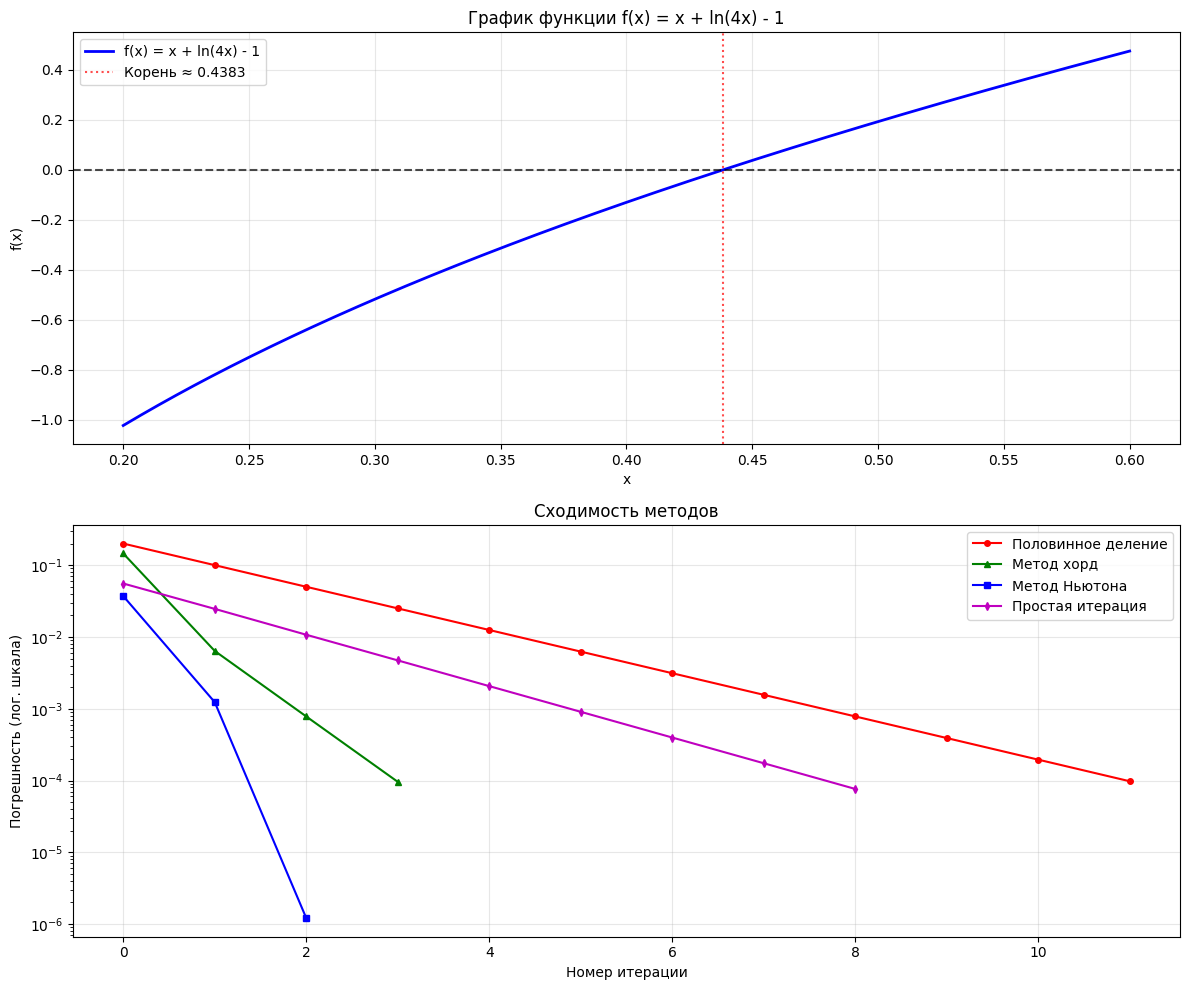


АНАЛИЗ СХОДИМОСТИ:
Метод половинного деления: линейная сходимость, надежный
Метод хорд: сверхлинейная сходимость, быстрее половинного деления
Метод Ньютона: квадратичная сходимость, самый быстрый
Метод простой итерации: линейная сходимость, |phi'(x)| < 1 в окрестности корня


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Исходная функция
def f(x):
    return x + np.log(4*x) - 1

# Производная функции
def df(x):
    return 1 + 1/x

# Метод половинного деления
def bisection_method(f, a, b, eps):
    print("Метод половинного деления:")
    iterations = 0
    results = []

    while (b - a) > eps:
        c = (a + b) / 2
        fa = f(a)
        fc = f(c)

        results.append((iterations, a, b, c, fc, b-a))

        if fa * fc < 0:
            b = c
        else:
            a = c

        iterations += 1

    # Последняя итерация
    c = (a + b) / 2
    results.append((iterations, a, b, c, f(c), b-a))

    for it, a_val, b_val, c_val, fc_val, error in results:
        print(f"Итерация {it}: a={a_val:.6f}, b={b_val:.6f}, c={c_val:.6f}, f(c)={fc_val:.6e}, погрешность={error:.6f}")

    return c, iterations, results

# Метод хорд
def chord_method(f, a, b, eps):
    print("\nМетод хорд:")
    iterations = 0
    results = []
    x_prev = a

    while True:
        fa = f(a)
        fb = f(b)
        x = a - fa * (b - a) / (fb - fa)
        fx = f(x)

        results.append((iterations, x, fx, abs(x - x_prev)))

        if abs(x - x_prev) < eps:
            break

        if fa * fx < 0:
            b = x
        else:
            a = x

        x_prev = x
        iterations += 1

    for it, x_val, fx_val, error in results:
        print(f"Итерация {it}: x={x_val:.6f}, f(x)={fx_val:.6e}, погрешность={error:.6e}")

    return x, iterations, results

# Метод Ньютона
def newton_method(f, df, x0, eps):
    print("\nМетод Ньютона:")
    iterations = 0
    results = []
    x = x0

    while True:
        fx = f(x)
        dfx = df(x)
        x_new = x - fx / dfx
        error = abs(x_new - x)

        results.append((iterations, x, fx, dfx, x_new, error))

        if error < eps:
            break

        x = x_new
        iterations += 1

    for it, x_val, fx_val, dfx_val, x_new_val, error in results:
        print(f"Итерация {it}: x={x_val:.6f}, f(x)={fx_val:.6e}, f'(x)={dfx_val:.6f}, x_new={x_new_val:.6f}, погрешность={error:.6e}")

    return x_new, iterations, results

# Метод простой итерации (исправленный)
def simple_iteration_method(f, x0, eps):
    print("\nМетод простой итерации:")

    # Преобразуем уравнение x + ln(4x) - 1 = 0 к виду x = phi(x)
    # Вариант 1: x = 1 - ln(4x) (не подходит - расходится)
    # Вариант 2: x = e^(1 - x) / 4
    def phi(x):
        return np.exp(1 - x) / 4

    # Проверяем условие сходимости |phi'(x)| < 1
    def dphi(x):
        return -np.exp(1 - x) / 4

    iterations = 0
    results = []
    x = x0

    print(f"Проверка условия сходимости в окрестности корня:")
    print(f"|phi'(0.4)| = {abs(dphi(0.4)):.6f}")
    print(f"|phi'(0.45)| = {abs(dphi(0.45)):.6f}")

    while True:
        x_new = phi(x)
        error = abs(x_new - x)

        results.append((iterations, x, x_new, error, f(x_new)))

        if error < eps:
            break

        x = x_new
        iterations += 1

        if iterations > 100:  # Защита от бесконечного цикла
            print("Превышено максимальное число итераций!")
            break

    for it, x_val, x_new_val, error, fx_val in results:
        print(f"Итерация {it}: x={x_val:.6f}, x_new={x_new_val:.6f}, погрешность={error:.6e}, f(x_new)={fx_val:.6e}")

    return x_new, iterations, results

# Основная программа
def main():
    eps = 1e-4

    # Аналитическое определение отрезка
    print("Анализ функции f(x) = x + ln(4x) - 1")
    print("Область определения: x > 0")

    # Вычислим значения функции в нескольких точках
    test_points = [0.1, 0.2, 0.3, 0.4, 0.5, 1.0]
    for x in test_points:
        print(f"f({x}) = {f(x):.6f}")

    # Выбираем отрезок [0.3, 0.5], где f(0.3) < 0, f(0.5) > 0
    a, b = 0.3, 0.5
    print(f"\nВыбран отрезок: [{a}, {b}]")
    print(f"f({a}) = {f(a):.6f} < 0")
    print(f"f({b}) = {f(b):.6f} > 0")
    print(f"На отрезке существует корень (по теореме Больцано-Коши)")

    # 1. Метод половинного деления
    root_bisection, iter_bisection, results_bisection = bisection_method(f, a, b, eps)

    # 2. Метод хорд
    root_chord, iter_chord, results_chord = chord_method(f, a, b, eps)

    # 3. Метод Ньютона
    # Начальное приближение выбираем по правилу неподвижной точки
    x0_newton = 0.4  # Ближе к корню
    root_newton, iter_newton, results_newton = newton_method(f, df, x0_newton, eps)

    # 4. Метод простой итерации
    x0_iter = 0.4
    root_iter, iter_iter, results_iter = simple_iteration_method(f, x0_iter, eps)

    # Сравнение методов
    print("\n" + "="*60)
    print("СРАВНЕНИЕ МЕТОДОВ")
    print("="*60)

    methods = [
        ("Половинное деление", root_bisection, iter_bisection),
        ("Метод хорд", root_chord, iter_chord),
        ("Метод Ньютона", root_newton, iter_newton),
        ("Простая итерация", root_iter, iter_iter)
    ]

    print(f"{'Метод':<20} {'Корень':<12} {'Итерации':<10} {'f(корень)':<12}")
    print("-" * 60)
    for name, root, iters in methods:
        print(f"{name:<20} {root:.6f}    {iters:<9} {f(root):.2e}")

    # Теоретическая оценка погрешности
    print(f"\nТеоретическая погрешность: ε = {eps}")
    print("Фактические погрешности:")
    exact_root = root_newton  # Берем самый точный метод как эталон
    for name, root, iters in methods:
        error = abs(root - exact_root)
        print(f"{name:<20}: {error:.2e}")

    # График функции
    x_plot = np.linspace(0.2, 0.6, 400)
    y_plot = f(x_plot)

    plt.figure(figsize=(12, 10))

    plt.subplot(2, 1, 1)
    plt.plot(x_plot, y_plot, 'b-', linewidth=2, label='f(x) = x + ln(4x) - 1')
    plt.axhline(y=0, color='k', linestyle='--', alpha=0.7)
    plt.axvline(x=root_bisection, color='r', linestyle=':', alpha=0.7, label=f'Корень ≈ {root_bisection:.4f}')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title('График функции f(x) = x + ln(4x) - 1')
    plt.grid(True, alpha=0.3)
    plt.legend()

    # Отображение итерационных процессов
    plt.subplot(2, 1, 2)
    methods_data = [
        (results_bisection, 'Половинное деление', 'ro-'),
        (results_chord, 'Метод хорд', 'g^-'),
        (results_newton, 'Метод Ньютона', 'bs-'),
        (results_iter, 'Простая итерация', 'md-')
    ]

    for results, label, style in methods_data:
        iterations = [r[0] for r in results]
        if label == 'Половинное деление':
            errors = [r[5] for r in results]  # погрешность для половинного деления
        elif label == 'Метод хорд':
            errors = [r[3] for r in results]  # погрешность для хорд
        elif label == 'Метод Ньютона':
            errors = [r[5] for r in results]  # погрешность для Ньютона
        else:
            errors = [r[3] for r in results]  # погрешность для простой итерации

        plt.semilogy(iterations, errors, style, label=label, markersize=4)

    plt.xlabel('Номер итерации')
    plt.ylabel('Погрешность (лог. шкала)')
    plt.title('Сходимость методов')
    plt.grid(True, alpha=0.3)
    plt.legend()

    plt.tight_layout()
    plt.show()

    # Анализ сходимости
    print("\nАНАЛИЗ СХОДИМОСТИ:")
    print("Метод половинного деления: линейная сходимость, надежный")
    print("Метод хорд: сверхлинейная сходимость, быстрее половинного деления")
    print("Метод Ньютона: квадратичная сходимость, самый быстрый")
    print("Метод простой итерации: линейная сходимость, |phi'(x)| < 1 в окрестности корня")

if __name__ == "__main__":
    main()

АНАЛИЗ СИСТЕМЫ УРАВНЕНИЙ:
Уравнение 1: cos(3x³) - xy + 0.85 = 0
Уравнение 2: xy³ - y - 4 = 0

Поиск начального приближения:
x = [1.0, 1.5], F(x) = [-1.639992, -2.125000], норма = 2.684250
x = [1.2, 1.3], F(x) = [-0.255678, -2.663600], норма = 2.675843
x = [1.3, 1.2], F(x) = [0.242998, -2.953600], норма = 2.963579
x = [1.4, 1.1], F(x) = [-1.059079, -3.236600], норма = 3.405470
x = [1.5, 1.0], F(x) = [-1.414699, -3.500000], норма = 3.775099

Выбрано начальное приближение: x0 = [1.2, 1.3]
Метод простых итераций:
Итерация 0:
  x = [1.200000, 1.300000]
  x_new = [1.101662, 1.470354]
  Погрешность = 1.967001e-01
  F(x_new) = [-1.415014e+00, -1.968367e+00]

Итерация 1:
  x = [1.101662, 1.470354]
  x_new = [0.620481, 1.588197]
  Погрешность = 4.954011e-01
  F(x_new) = [6.185649e-01, -3.102538e+00]

Итерация 2:
  x = [0.620481, 1.588197]
  x_new = [0.815219, 1.834380]
  Погрешность = 3.138937e-01
  F(x_new) = [-6.999390e-01, -8.023583e-01]

Итерация 3:
  x = [0.815219, 1.834380]
  x_new = [0.62

/tmp/ipython-input-3895971567.py:7: RuntimeWarning: overflow encountered in scalar power
  f1 = np.cos(3*x**3) - x*y + 0.85
/tmp/ipython-input-3895971567.py:7: RuntimeWarning: invalid value encountered in cos
  f1 = np.cos(3*x**3) - x*y + 0.85
/tmp/ipython-input-3895971567.py:7: RuntimeWarning: overflow encountered in scalar multiply
  f1 = np.cos(3*x**3) - x*y + 0.85
/tmp/ipython-input-3895971567.py:8: RuntimeWarning: overflow encountered in scalar power
  f2 = x*y**3 - y - 4
/tmp/ipython-input-3895971567.py:15: RuntimeWarning: overflow encountered in scalar power
  df1_dx = -9*x**2 * np.sin(3*x**3) - y
/tmp/ipython-input-3895971567.py:15: RuntimeWarning: invalid value encountered in sin
  df1_dx = -9*x**2 * np.sin(3*x**3) - y
/tmp/ipython-input-3895971567.py:19: RuntimeWarning: overflow encountered in scalar power
  df2_dx = y**3
/tmp/ipython-input-3895971567.py:20: RuntimeWarning: overflow encountered in scalar power
  df2_dy = 3*x*y**2 - 1


ValueError: 'redo-' is not a valid format string (unrecognized character 'e')

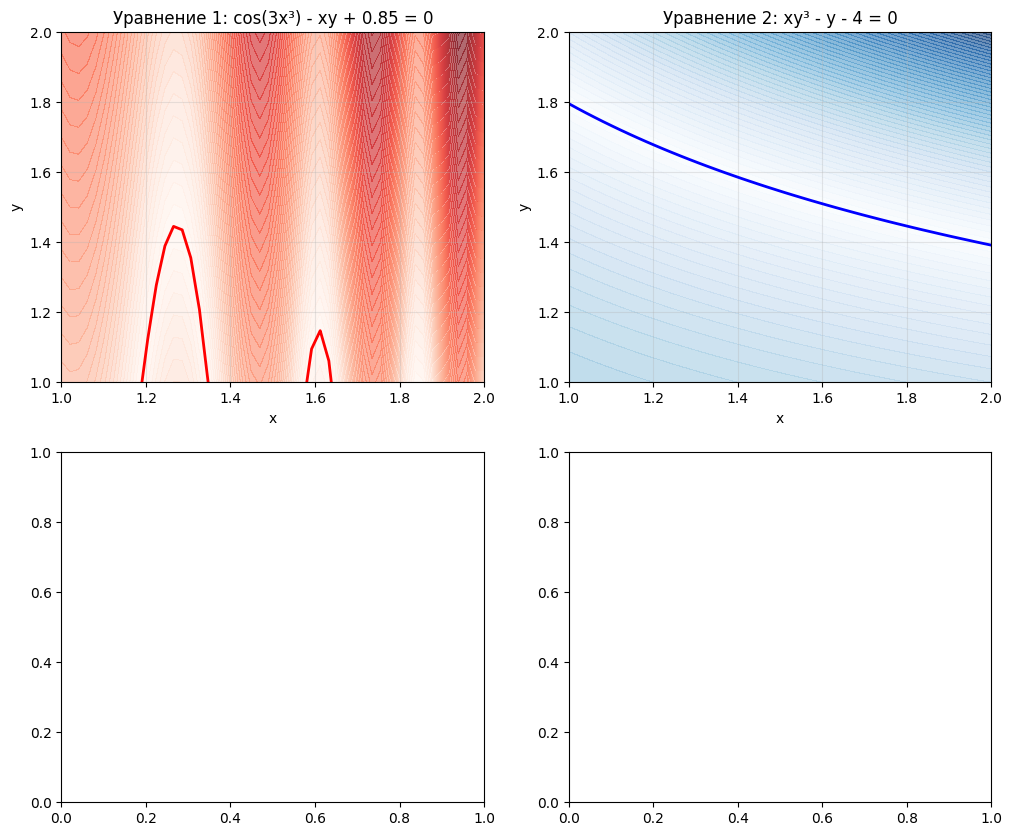

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def F(X):
    x, y = X
    f1 = np.cos(3*x**3) - x*y + 0.85
    f2 = x*y**3 - y - 4
    return np.array([f1, f2])

# Якобиан для метода наискорейшего спуска
def jacobian(X):
    x, y = X
    # Производные первого уравнения
    df1_dx = -9*x**2 * np.sin(3*x**3) - y
    df1_dy = -x

    # Производные второго уравнения
    df2_dx = y**3
    df2_dy = 3*x*y**2 - 1

    return np.array([[df1_dx, df1_dy],
                    [df2_dx, df2_dy]])

# Метод простых итераций (исправленный)
def simple_iterations_method(F, x0, eps, max_iter=100):
    print("Метод простых итераций:")
    print("=" * 50)

    # Более стабильное преобразование системы
    def phi(X):
        x, y = X
        # Из первого уравнения: x = (cos(3x³) + 0.85)/y
        # Но чтобы избежать деления на ноль, используем итерационную формулу:
        phi1 = (np.cos(3*x**3) + 0.85) / max(y, 0.1)  # Защита от деления на 0
        # Из второго уравнения: y = (4 + y)/(x*y²) но это нестабильно
        # Вместо этого используем: y = ∛((y + 4)/x)
        phi2 = ((y + 4) / max(x, 0.1)) ** (1/3)  # Защита от деления на 0

        # Применяем релаксацию для стабильности
        alpha = 0.5
        return np.array([x * (1-alpha) + phi1 * alpha,
                        y * (1-alpha) + phi2 * alpha])

    x = x0.copy()
    iterations = 0
    results = []

    while iterations < max_iter:
        try:
            x_new = phi(x)
            error = np.linalg.norm(x_new - x)
            f_val = F(x_new)

            results.append((iterations, x.copy(), x_new.copy(), error, f_val.copy()))

            print(f"Итерация {iterations}:")
            print(f"  x = [{x[0]:.6f}, {x[1]:.6f}]")
            print(f"  x_new = [{x_new[0]:.6f}, {x_new[1]:.6f}]")
            print(f"  Погрешность = {error:.6e}")
            print(f"  F(x_new) = [{f_val[0]:.6e}, {f_val[1]:.6e}]")
            print()

            if error < eps and np.linalg.norm(f_val) < eps:
                break

            x = x_new
            iterations += 1

        except (FloatingPointError, ValueError) as e:
            print(f"Ошибка на итерации {iterations}: {e}")
            break

    return x_new, iterations, results

# Метод наискорейшего спуска (исправленный)
def steepest_descent_method(F, jacobian, x0, eps, max_iter=100):
    print("Метод наискорейшего спуска:")
    print("=" * 50)

    x = x0.copy()
    iterations = 0
    results = []

    while iterations < max_iter:
        try:
            f_val = F(x)
            J = jacobian(x)

            # Градиент функции 0.5*||F(x)||²
            grad = J.T @ f_val

            # Адаптивный выбор шага
            alpha = 0.1 / (1 + iterations * 0.1)  # Уменьшаем шаг со временем

            x_new = x - alpha * grad

            # Проверка на выход за разумные пределы
            if np.any(np.abs(x_new) > 100) or np.any(np.isnan(x_new)):
                print("Выход за пределы, уменьшаем шаг")
                alpha *= 0.1
                x_new = x - alpha * grad

            error = np.linalg.norm(x_new - x)
            f_val_new = F(x_new)

            results.append((iterations, x.copy(), x_new.copy(), error, f_val.copy(), np.linalg.norm(f_val)))

            print(f"Итерация {iterations}:")
            print(f"  x = [{x[0]:.6f}, {x[1]:.6f}]")
            print(f"  F(x) = [{f_val[0]:.6e}, {f_val[1]:.6e}], норма = {np.linalg.norm(f_val):.6e}")
            print(f"  Градиент = [{grad[0]:.6e}, {grad[1]:.6e}]")
            print(f"  x_new = [{x_new[0]:.6f}, {x_new[1]:.6f}]")
            print(f"  Погрешность = {error:.6e}")
            print()

            if error < eps and np.linalg.norm(f_val) < eps:
                break

            x = x_new
            iterations += 1

        except (FloatingPointError, ValueError) as e:
            print(f"Ошибка на итерации {iterations}: {e}")
            break

    return x_new, iterations, results

# Альтернативный метод - модифицированный Ньютон (для сравнения)
def modified_newton_method(F, jacobian, x0, eps, max_iter=50):
    print("Модифицированный метод Ньютона (для сравнения):")
    print("=" * 50)

    x = x0.copy()
    iterations = 0
    results = []

    while iterations < max_iter:
        try:
            f_val = F(x)
            J = jacobian(x)

            # Решаем систему J * dx = -F(x)
            dx = np.linalg.solve(J, -f_val)

            # Дробный шаг для стабильности
            alpha = 1.0
            x_new = x + alpha * dx

            # Если шаг слишком большой, уменьшаем его
            if np.linalg.norm(dx) > 1.0:
                alpha = 1.0 / np.linalg.norm(dx)
                x_new = x + alpha * dx

            error = np.linalg.norm(x_new - x)
            f_val_new = F(x_new)

            results.append((iterations, x.copy(), x_new.copy(), error, f_val.copy(), np.linalg.norm(f_val)))

            print(f"Итерация {iterations}:")
            print(f"  x = [{x[0]:.6f}, {x[1]:.6f}]")
            print(f"  F(x) = [{f_val[0]:.6e}, {f_val[1]:.6e}], норма = {np.linalg.norm(f_val):.6e}")
            print(f"  x_new = [{x_new[0]:.6f}, {x_new[1]:.6f}]")
            print(f"  Погрешность = {error:.6e}")
            print()

            if error < eps and np.linalg.norm(f_val) < eps:
                break

            x = x_new
            iterations += 1

        except (np.linalg.LinAlgError, FloatingPointError, ValueError) as e:
            print(f"Ошибка на итерации {iterations}: {e}")
            break

    return x_new, iterations, results

# Визуализация
def plot_results(F, results_si, results_sd, results_nm, x_range=(0.5, 2.0), y_range=(0.5, 2.0)):
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))

    # Создаем сетку для построения линий уровня
    x = np.linspace(x_range[0], x_range[1], 50)
    y = np.linspace(y_range[0], y_range[1], 50)
    X, Y = np.meshgrid(x, y)

    Z1 = np.zeros_like(X)
    Z2 = np.zeros_like(X)

    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            try:
                f_val = F([X[i,j], Y[i,j]])
                Z1[i,j] = f_val[0]  # Первое уравнение
                Z2[i,j] = f_val[1]  # Второе уравнение
            except:
                Z1[i,j] = np.nan
                Z2[i,j] = np.nan

    # Первое уравнение
    contour1 = axes[0,0].contour(X, Y, Z1, levels=[0], colors='red', linewidths=2)
    axes[0,0].contourf(X, Y, np.abs(Z1), levels=50, alpha=0.6, cmap='Reds')
    axes[0,0].set_title('Уравнение 1: cos(3x³) - xy + 0.85 = 0')
    axes[0,0].set_xlabel('x')
    axes[0,0].set_ylabel('y')
    axes[0,0].grid(True, alpha=0.3)

    # Второе уравнение
    contour2 = axes[0,1].contour(X, Y, Z2, levels=[0], colors='blue', linewidths=2)
    axes[0,1].contourf(X, Y, np.abs(Z2), levels=50, alpha=0.6, cmap='Blues')
    axes[0,1].set_title('Уравнение 2: xy³ - y - 4 = 0')
    axes[0,1].set_xlabel('x')
    axes[0,1].set_ylabel('y')
    axes[0,1].grid(True, alpha=0.3)

    # Траектории методов
    colors = ['red', 'magenta', 'green']
    labels = ['Простые итерации', 'Наиск. спуск', 'Мод. Ньютон']
    results_list = [results_si, results_sd, results_nm]

    for i, (results, color, label) in enumerate(zip(results_list, colors, labels)):
        if results:  # Если есть результаты
            x_vals = [r[1][0] for r in results]
            y_vals = [r[1][1] for r in results]
            axes[1,0].plot(x_vals, y_vals, color + 'o-', markersize=3, label=label, alpha=0.7)
            if x_vals:
                axes[1,0].plot(x_vals[0], y_vals[0], color + 's', markersize=8, markeredgecolor='black')
                axes[1,0].plot(x_vals[-1], y_vals[-1], color + 'D', markersize=8, markeredgecolor='black')

    axes[1,0].set_xlabel('x')
    axes[1,0].set_ylabel('y')
    axes[1,0].set_title('Траектории методов')
    axes[1,0].legend()
    axes[1,0].grid(True, alpha=0.3)

    # Сходимость
    for i, (results, color, label) in enumerate(zip(results_list, colors, labels)):
        if results:
            errors = [r[3] for r in results]
            axes[1,1].semilogy(range(len(errors)), errors, color + 'o-', label=label, alpha=0.7)

    axes[1,1].set_xlabel('Итерация')
    axes[1,1].set_ylabel('Погрешность (лог. шкала)')
    axes[1,1].set_title('Сходимость методов')
    axes[1,1].legend()
    axes[1,1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

# Основная программа
def main():
    eps = 1e-4

    print("АНАЛИЗ СИСТЕМЫ УРАВНЕНИЙ:")
    print("Уравнение 1: cos(3x³) - xy + 0.85 = 0")
    print("Уравнение 2: xy³ - y - 4 = 0")
    print()

    # Более тщательный поиск начального приближения
    print("Поиск начального приближения:")
    test_points = [
        [1.0, 1.5],
        [1.2, 1.3],
        [1.3, 1.2],
        [1.4, 1.1],
        [1.5, 1.0]
    ]

    best_point = None
    best_norm = float('inf')

    for point in test_points:
        try:
            f_val = F(point)
            norm_f = np.linalg.norm(f_val)
            print(f"x = [{point[0]:.1f}, {point[1]:.1f}], F(x) = [{f_val[0]:.6f}, {f_val[1]:.6f}], норма = {norm_f:.6f}")

            if norm_f < best_norm and not np.any(np.isnan(f_val)):
                best_norm = norm_f
                best_point = point
        except:
            continue

    # Выбираем начальное приближение
    if best_point is None:
        x0 = np.array([1.3, 1.2])  # Резервный вариант
    else:
        x0 = np.array(best_point)

    print(f"\nВыбрано начальное приближение: x0 = [{x0[0]:.1f}, {x0[1]:.1f}]")

    # 1. Метод простых итераций
    root_si, iter_si, results_si = simple_iterations_method(F, x0, eps)

    # 2. Метод наискорейшего спуска
    root_sd, iter_sd, results_sd = steepest_descent_method(F, jacobian, x0, eps)

    # 3. Модифицированный метод Ньютона (для сравнения)
    root_nm, iter_nm, results_nm = modified_newton_method(F, jacobian, x0, eps)

    # Сравнение методов
    print("\n" + "="*60)
    print("СРАВНЕНИЕ МЕТОДОВ")
    print("="*60)

    methods = []
    if results_si:
        methods.append(("Простые итерации", root_si, iter_si, np.linalg.norm(F(root_si))))
    if results_sd:
        methods.append(("Наиск. спуск", root_sd, iter_sd, np.linalg.norm(F(root_sd))))
    if results_nm:
        methods.append(("Мод. Ньютон", root_nm, iter_nm, np.linalg.norm(F(root_nm))))

    print(f"{'Метод':<20} {'Корень':<25} {'Итерации':<10} {'||F(x)||':<12}")
    print("-" * 70)
    for name, root, iters, norm_f in methods:
        print(f"{name:<20} [{root[0]:.6f}, {root[1]:.6f}] {iters:<9} {norm_f:.2e}")

    # Визуализация
    plot_results(F, results_si, results_sd, results_nm, x_range=(1.0, 2.0), y_range=(1.0, 2.0))

    print("\nВЫВОДЫ:")
    print("Система имеет сложное поведение из-за нелинейностей cos(3x³) и xy³")
    print("Рекомендуется использовать метод Ньютона с дробным шагом для устойчивости")

if __name__ == "__main__":
    main()

Интерполяционный полином Ньютона:
0.00424425237989038*x**3 - 0.060741694689425*x**2 + 0.60200506019222*x + 1.45449238211731


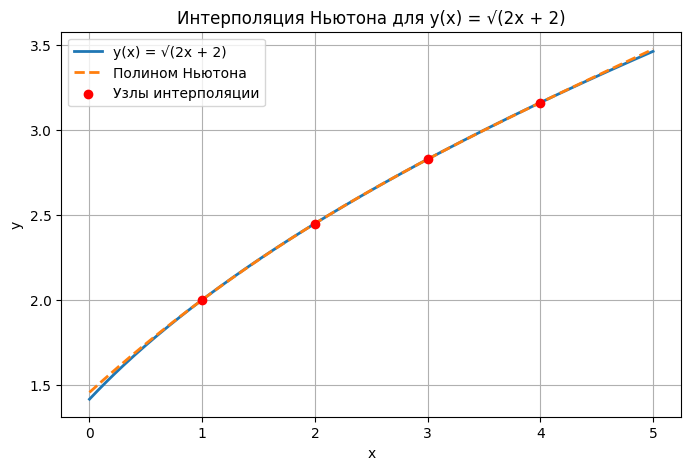

In [ ]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

# Исходная функция
f = lambda x: np.sqrt(2 * x + 2)

# Узлы и значения функции
x_nodes = np.array([1, 2, 3, 4], dtype=float)
y_nodes = f(x_nodes)

# Функция для вычисления разделённых разностей
def divided_diff(x, y):
    n = len(y)
    coef = np.copy(y)
    for j in range(1, n):
        coef[j:n] = (coef[j:n] - coef[j - 1:n - 1]) / (x[j:n] - x[0:n - j])
    return coef

# Находим коэффициенты Ньютона
a = divided_diff(x_nodes, y_nodes)

# Символьная переменная
x = sp.Symbol('x')

# Строим полином Ньютона
n = len(a)
P = a[0]
for i in range(1, n):
    term = a[i]
    for j in range(i):
        term *= (x - x_nodes[j])
    P += term

# Упрощаем выражение
P_simplified = sp.simplify(P)

print("Интерполяционный полином Ньютона:")
print(P_simplified.expand())

# --- Построение графика ---
x_vals = np.linspace(0, 5, 200)
y_true = f(x_vals)
y_interp = [P_simplified.subs(x, val) for val in x_vals]

plt.figure(figsize=(8,5))
plt.plot(x_vals, y_true, label="y(x) = √(2x + 2)", linewidth=2)
plt.plot(x_vals, y_interp, '--', label="Полином Ньютона", linewidth=2)
plt.scatter(x_nodes, y_nodes, color='red', zorder=5, label="Узлы интерполяции")
plt.title("Интерполяция Ньютона для y(x) = √(2x + 2)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()
